# B. Khám phá dữ liệu

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

In [11]:
df = pd.read_csv("./datasets/HR_Analytics.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Biểu đồ 1:

**Tiêu đề:** Tỉ lệ các cấp độ trong công việc

**Loại biểu đồ:** TreeMap

**Lý do lựa chọn:**
Để so sánh tỉ lệ sự phân bố của các cấp độ trong công việc có trong thuộc tính 'Job Level', thì biểu đồ TreeMap là một lựa chọn phù hợp. Vì TreeMap là một loại biểu đồ thống kê hiển thị dữ liệu dưới dạng các hình chữ nhật có diện tích khác nhau, trong đó độ lớn của hình chữ nhật sẽ đại diện cho giá trị lượng của một biến. Ta sẽ biểu diễn số lượng các giá trị có trong thuộc tính 'JobLevel' bằng diện tích các hình chữ nhật.

**Trực quan hóa:**

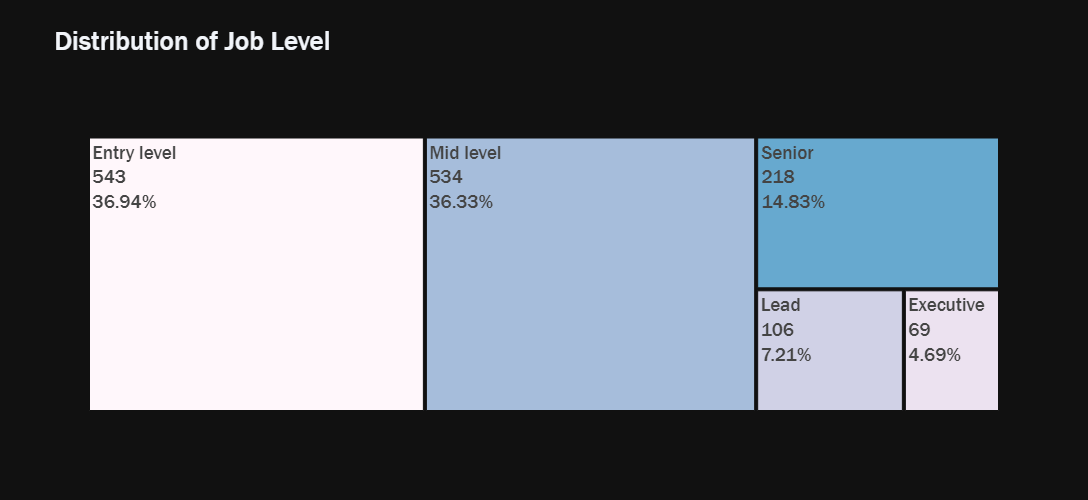

In [12]:
plot_df = df.copy()
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories( 
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])

plot_df = plot_df['JobLevel'].value_counts()

fig = px.treemap(plot_df, 
                 path=[plot_df.index],
                 values=plot_df.values, 
                 title = 'Distribution of Job Level',
                 color=plot_df.index,
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 template='plotly_dark',
                 width=1000, height=500)

percents = np.round((100*plot_df.values / sum(plot_df.values)).tolist(),2)

fig.data[0].customdata = [36.94, 4.69, 7.21, 36.33, 14.83]
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))
fig.show()

**Nhận xét:** từ biểu đồ TreeMap, ta thấy:

- 'Entry level' (vị trí công việc của những người có ít kinh nghiệm làm việc) chiếm số lượng lớn nhất với 543 người (chiếm 36.94%), tương ứng với hình chữ nhật có diện tích lớn nhất. Xếp ngay sau đó là 'Mid level' với 534 người (chiếm 36.33%).

- Chiếm tỉ lệ ít nhất là 'Executive' (vị trí cấp cao, có vai trò rất quan trọng trong mỗi phòng ban) với chỉ 69 người (chiếm 4.69%).

=>  Cấp bậc trong công việc càng cao thì số lượng nhân sự càng ít.

## Biểu đồ 2:

**Tiêu đề:** Tên các lĩnh vực học tập thể hiện qua đám mây từ

**Loại biểu đồ:** WordCloud

**Lý do lựa chọn:** Một đám mây từ trong Python sẽ biểu thị trực quan cho dữ liệu văn bản. Còn được gọi là đám mây thẻ, nó sử dụng các cỡ chữ và màu sắc khác nhau để làm nổi bật tầm quan trọng của mỗi từ. Bằng cách này sẽ làm nổi trội tên các lĩnh vực học tập của nhân viên (Education Field) để lại ấn tượng cho người xem.

**Trực quan hóa:**

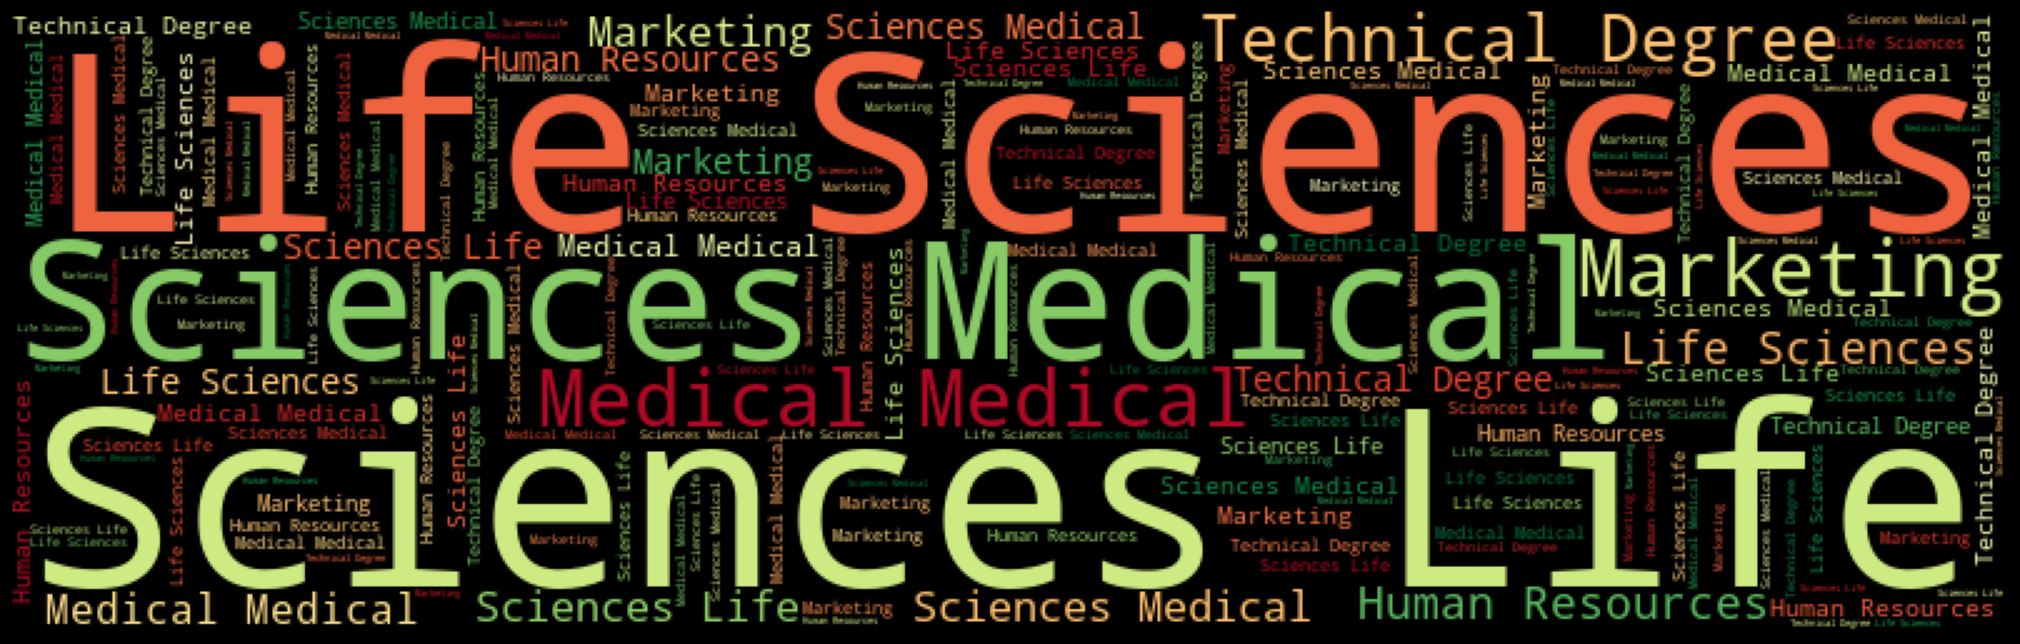

In [13]:
text = " ".join(EducationField for EducationField in df["EducationField"])
wordcloud = WordCloud(width = 800, height = 250, 
            background_color ="black",colormap="RdYlGn",max_font_size=100, stopwords =None,repeat= True).generate(text)
plt.figure(figsize = (20, 8),facecolor= "black") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0) 
plt.show()

**Nhận xét:** có rất nhiều tên nghành học được thể hiện một cách đặc sắc trên WordCloud như: human resources, sciences medical, life sciences, marketing, technical degree, ...

## Biểu đồ 3:

**Tiêu đề:** Mức độ đi công tác ở mỗi phòng ban

**Loại biểu đồ:** Radar chart

**Lý do lựa chọn:** Radar Chart là một biểu đồ đa diện được sử dụng để biểu thị dữ liệu đa chiều với các đặc trưng cho trước được đặt ở các trục khác nhau. Khi áp dụng cho thuộc tính 'Department' và 'BusinessTravel' ta sẽ có được tỉ lệ mức độ đi công tác của từng phòng ban, trong đó:
- Mức độ đi công tác (Non-Travel, Travel_Frequently,Travel_Rarely): sẽ nằm ở các trục có chia tỷ tệ.
- Màu sắc hình đa diện đại diện cho tên phòng ban (Human_Resource, Research_Development, Sales).

**Trực quan hóa:**

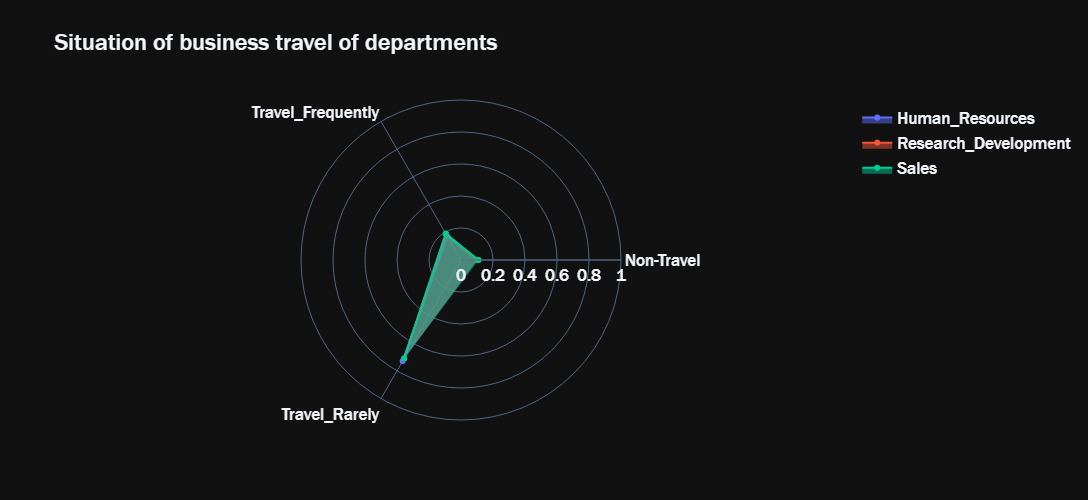

In [14]:
plot_df = df.groupby(['Department','BusinessTravel']).size()
Human_Resources=np.round(plot_df['Human Resources'].values/(plot_df['Human Resources'].values.sum()),2)
Research_Development=np.round(plot_df['Research & Development'].values/(plot_df['Research & Development'].values.sum()),2)
Sales=np.round(plot_df['Sales'].values/(plot_df['Sales'].values.sum()),2)

categories = ['Non-Travel', 'Travel_Frequently','Travel_Rarely']
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
             r = Human_Resources, 
             theta = categories,
             fill = 'toself',
             name = 'Human_Resources'
             ))
fig.add_trace(go.Scatterpolar(
             r = Research_Development, 
             theta = categories,
             fill = 'toself',
             name = 'Research_Development'
             ))
fig.add_trace(go.Scatterpolar(
             r = Sales, 
             theta = categories,
             fill = 'toself',
             name = 'Sales'
             ))
fig.update_layout(
    polar=dict(
    radialaxis=dict(
        range=[0, 1]
    )),
    font = dict(family="Franklin Gothic", size=17),
    showlegend=True,
    title = 'Situation of business travel of departments',
    height = 500,
    width = 1000
)
fig.layout.template = 'plotly_dark'
fig.show()

**Nhận xét**: Dựa vào biểu đồ Radar chart bên trên, ta có thể thấy: 
- Các hình tam giác gần như xếp chồng lên nhau, cho thấy mức độ đi công tác ở các phòng ban khá tương đồng.
- Tỉ lệ 'Travel_Rarely' (hiếm khi đi công tác) là lớn nhất và 'Non-Travel'(không bao giờ đi công tác) là thấp nhất ở tất cả các phòng ban. Tỷ lệ này khá phổ biến ở các công ty, do thông thường việc đi công tác hay thuộc về các vị trí có cấp bậc cao trong công việc, và cấp bậc càng cao thì số lượng nhân sự càng ít (được minh chứng ở biểu đồ 1).

## Biểu đồ 4:

**Tiêu đề:** Thu nhập hàng tháng theo tổng số năm làm việc và cấp bậc trong công việc

**Loại biểu đồ:** Scatter plot

**Lý do lựa chọn:** 
- Scatter plot là một công cụ mạnh mẽ để thể hiện quan hệ giữa hai biến số liên tục là 'MonthlyIcome' và 'TotalWorkingYears'. Ngoài ra để phân loại điểm dữ liệu thuộc 'JobLevel' nào ta có thể dùng tham số 'color', hoặc để thể hiện độ lớn của 'MonthyIncome' ta có thể sử dụng tham số 'size' trong syntax của Scatter plot để biểu thị.

**Trực quan hóa:**

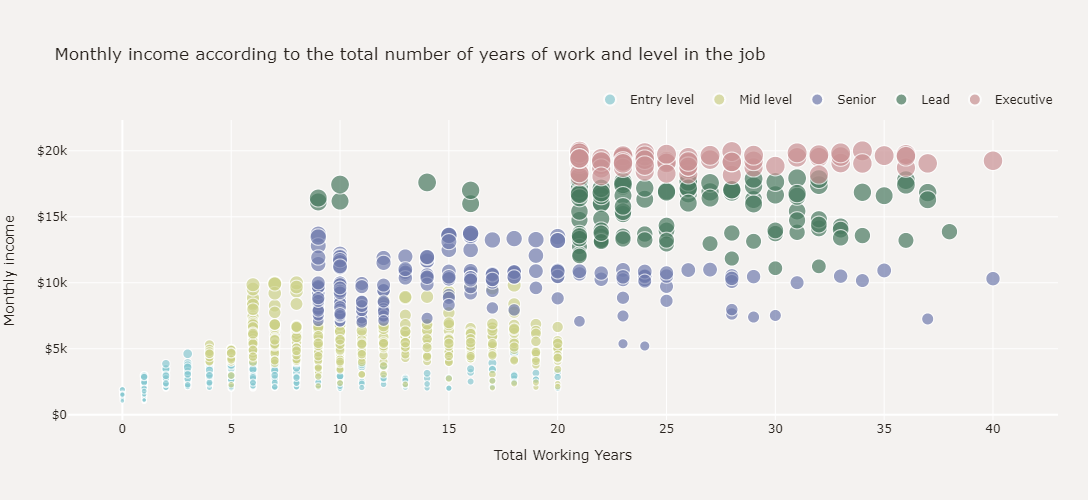

In [15]:
plot_df = df.copy()
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories( 
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])
col=['#88C9D1', '#CCD188', '#707BAD', '#48795E','#C99193']
fig = px.scatter(plot_df, x='TotalWorkingYears', y='MonthlyIncome', 
                 color='JobLevel', size='MonthlyIncome',
                 color_discrete_sequence=col, 
                 category_orders={'JobLevel': ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive']})
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  title='Monthly income according to the total number of years of work and level in the job <br>',
                  xaxis_title='Total Working Years', yaxis=dict(title='Monthly income',tickprefix='$'), 
                  legend_title='', font_color='#28221D',
                  margin=dict(l=40, r=30, b=80, t=120),paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',
                  height = 500,
                  width = 1000)
fig.show()


**Nhận xét:** Dựa vào biểu đồ phân tán (scatter plot) bên trên, ta có thể thấy:
- Cấp bậc trong công việc càng cao thì thu nhập hằng tháng có xu hướng càng nhiều.
- Các cấp bậc như : Entry level, Mid level có số năm làm việc trong khoảng từ 0 - 20 năm. Trong khi để có thể ở vị trí cao nhất là Executive thì cần số năm làm việc trên 20 năm, thậm chí trên 35 năm.

=> Số năm làm việc có thể đại diện cho kinh nghiệm làm việc ở mỗi người, kinh nghiệm càng nhiều thì mức lương sẽ càng lớn và được tăng cấp bậc trong vị trí công việc.

